In [11]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 

# Importing the data 

In [12]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Feature scaling 

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# creating a data structure with 60 timesteps and 1 outputs

In [14]:
X_train = []
Y_train = []
for i in range (60 , 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    Y_train.append (training_set_scaled[i , 0])
X_train , Y_train = np.array(X_train) , np.array(Y_train)


# Reshaping 

In [15]:
X_train = np.reshape(X_train , (X_train.shape[0] , X_train.shape[1] , 1))

# Importing  the Keras libraries and packages

In [16]:
from keras.models import Sequential 
from keras.layers import LSTM , Dense , Dropout

# Initializing the RNN

In [17]:
regressor = Sequential()


# first LSTM and Dropout regularisation 

In [18]:
regressor.add(LSTM(units=50 , return_sequences=True , input_shape=(X_train.shape[1] , 1)))
regressor.add(Dropout(0.2))

/home/kygiet/anaconda3/envs/MLapps/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# 2nd LSTM

In [19]:
regressor.add(LSTM(units=50 , return_sequences=True ))
regressor.add(Dropout(0.2))

# 3rd LSTM 

In [20]:
regressor.add(LSTM(units=50 , return_sequences=True ))
regressor.add(Dropout(0.2))

# 4th LSTM

In [21]:
regressor.add(LSTM(units=50 , return_sequences=False ))
regressor.add(Dropout(0.2))

# Adding the output

In [22]:
regressor.add(Dense(units=1))

# optimizing the RNN

In [23]:
regressor.compile(optimizer='adam' , loss='mean_squared_error')

# Fitting the RNN to the Training set

In [24]:
regressor.fit(X_train , Y_train , epochs=100 , batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.1067
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0063
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0050
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0044
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0051
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0052
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0047
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0041
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0046
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0046
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0043
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0044
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0042
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0044
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - lo

# Getting the real stock price of 2017

In [25]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Predicted stock price of 2017

In [29]:
dataset_total = pd.concat((dataset_train['Open'] , dataset_test['Open']), axis=0) 
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60 : ].values
inputs = inputs.reshape(-1 , 1)
inputs = sc.transform(inputs)
X_test = []
for i in range (60 , 80):
    X_test.append(inputs[i-60:i, 0])
X_test= np.array(X_test) 
X_test = np.reshape(X_test , (X_test.shape[0] , X_test.shape[1] , 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


# Visualizing the results 

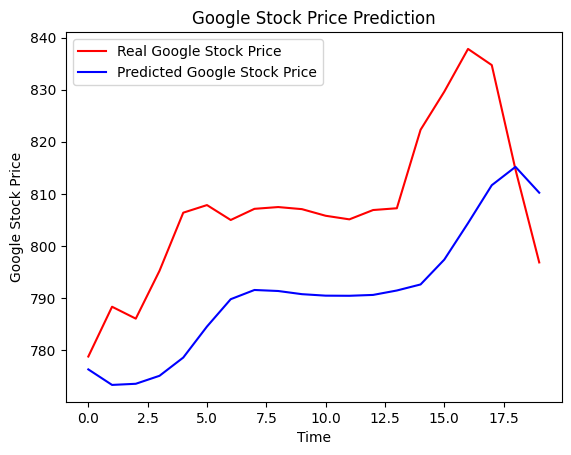

In [30]:
plt.plot(real_stock_price , color='red' , label='Real Google Stock Price')
plt.plot(predicted_stock_price , color='blue' , label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()